\section*{b)}

Cambiamos estas 2 ecuaciones a 4 de primero orden de la siguiete manera.
\begin{align*}
v_x&= \dot{x}             &v_y= \dot{y} \\
\frac{dv_x}{dt}&= \ddot{x}  &\frac{dv_y}{dt}= \ddot{y}
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(r,t):
    x=r[0]
    y=r[1]
    vx=r[2]
    vy=r[3]
    fxx= -((np.pi*R**2 *rho *C)/(2*m)) *vx*np.sqrt(vx**2 + vy**2)
    fyy= -g -((np.pi*R**2 *rho *C)/(2*m)) *vy*np.sqrt(vx**2 + vy**2)
    return np.array([vx,vy,fxx,fyy],float)

def rk4_2d(f,a,b,N,Init_cond=[0,0]):
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    ypoints = []
    vxpoints= []
    vypoints= []
    r = np.array(Init_cond,float)
    for t in tpoints:
        if r[1] <0:
            #detener el cálculo cuando se llegue al suelo
            #print('breaking at t={}'.format(t))
            break
            
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints,xpoints,ypoints,vxpoints,vypoints

m=1 #kg
R=0.08 #m
angle=30*np.pi/180
v0x=100*np.cos(angle)
v0y=100*np.sin(angle)
init_cond=[0,0,v0x,v0y]
rho=1.22 #kg/m^3
C=0.47
g=9.81 #m/sˆ2

a=0
b=100
N=5000

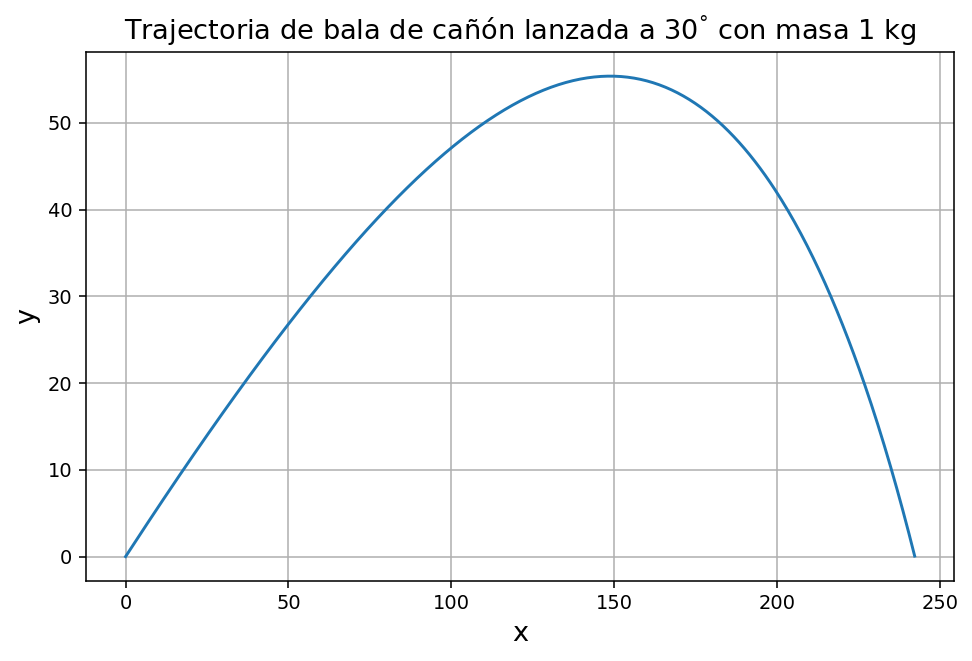

In [3]:
t,x,y,vx,vy= rk4_2d(f,a,b,N,Init_cond=init_cond)

plt.figure(figsize=(8,5),dpi=140)
plt.plot(x,y)
plt.title(r"Trajectoria de bala de cañón lanzada a $30^\degree$ con masa 1 kg",size=14)
plt.xlabel("x",size=14)
plt.ylabel('y',size=14)
plt.grid()
plt.show()

\section*{c)}

In [4]:
print("El proyectil (con masa {} kg) viajó una distancia máxima de {:.3f} m con resistencia de aire".format(m,x[-1]))

El proyectil (con masa 1 kg) viajó una distancia máxima de 242.296 m con resistencia de aire


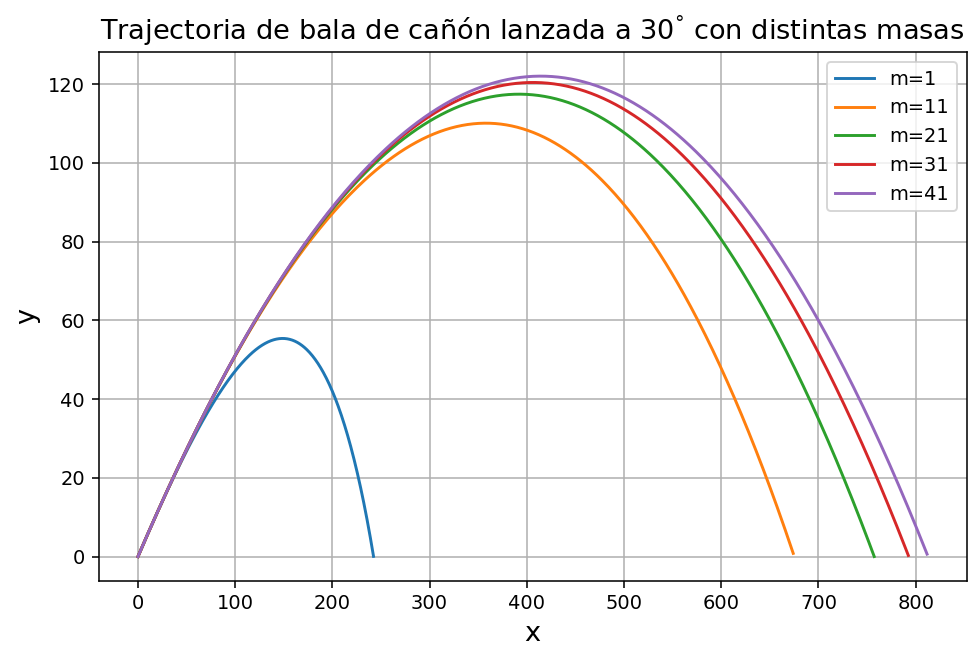

In [5]:
plt.figure(figsize=(8,5),dpi=140)
for m in np.arange(1,50,10):
    t,x,y,vx,vy= rk4_2d(f,a,b,N,Init_cond=init_cond) 
    plt.plot(x,y,label='m={}'.format(m))
plt.title(r"Trajectoria de bala de cañón lanzada a $30^\degree$ con distintas masas",size=14)
plt.xlabel("x",size=14)
plt.ylabel('y',size=14)
plt.grid()
plt.legend()
plt.show()

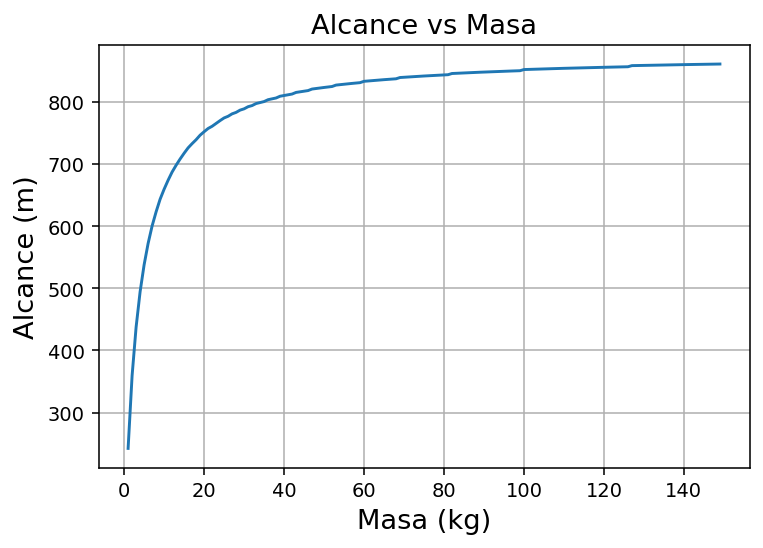

In [6]:
plt.figure(dpi=140)
M=[]
alcance=[]
for m in np.arange(1,150):
    t,x,y,vx,vy= rk4_2d(f,a,b,N,Init_cond=init_cond) 
    M.append(m)
    alcance.append(x[-1])
plt.plot(M,alcance)
plt.title(r"Alcance vs Masa",size=14)
plt.xlabel("Masa (kg)",size=14)
plt.ylabel('Alcance (m)',size=14)
plt.grid()
plt.show()

Lo que podemos observar es que la mientras más masa tiene el objeto mayor distancia puede viajar. Esto es debido a que la esfera tendría cada vez mas densidad ya que no estamos aumentando sus dimensiones (Radio constante) y por lo tanto siente cada vez menos los efectos de la fuerza de arrastre y adicionalmente tendrá más inercia que evite que cambie su estado de movimiento mientras aumentemos la masa.